In [1]:
# prompt: mount

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Clean, categorize, and visualize Google Play Store data to understand app market dynamics.

Gain in-depth insights into the Android app market by leveraging data analytics, visualization,
and enhanced interpretation skills.



Data Preparation:
Clean and correct data types for accuracy.

In [2]:
import pandas as pd

# File paths
apps_file_path = '/content/drive/MyDrive/Internship/archive (9)/datasets/apps.csv'
user_reviews_file_path = '/content/drive/MyDrive/Internship/archive (9)/datasets/user_reviews.csv'

# Load the datasets
apps_df = pd.read_csv(apps_file_path)
user_reviews_df = pd.read_csv(user_reviews_file_path)

# Display the first few rows of each dataset
apps_df_head = apps_df.head()
apps_df_info = apps_df.info()

user_reviews_df_head = user_reviews_df.head()
user_reviews_df_info = user_reviews_df.info()

apps_df_head, apps_df_info, user_reviews_df_head, user_reviews_df_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #

(   Unnamed: 0                                                App  \
 0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
 1           1                                Coloring book moana   
 2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
 3           3                              Sketch - Draw & Paint   
 4           4              Pixel Draw - Number Art Coloring Book   
 
          Category  Rating  Reviews  Size     Installs  Type Price  \
 0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
 1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
 2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
 3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
 4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   
 
   Content Rating                     Genres      Last Updated  \
 0       Everyone               Art & Design   January 7, 2018   
 1       Everyone  Art & Desig

In [3]:
# Cleaning apps.csv
# Drop the redundant column
apps_df = apps_df.drop(columns=["Unnamed: 0"])

# Convert 'Installs' to numeric by removing '+' and ','
apps_df['Installs'] = apps_df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Convert 'Price' to numeric by removing '$'
apps_df['Price'] = apps_df['Price'].str.replace('$', '', regex=False).astype(float)

# Parse 'Last Updated' to datetime format
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'], errors='coerce')

# Standardize 'Size' (e.g., MB/KB conversion)
def convert_size(size):
    if pd.isna(size):
        return None
    elif 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024  # Convert KB to MB
    else:
        return None

apps_df['Size'] = apps_df['Size'].astype(str).map(convert_size)

# Cleaning user_reviews.csv
# Drop rows where all critical columns are NaN
user_reviews_df = user_reviews_df.dropna(subset=["Sentiment", "Sentiment_Polarity", "Sentiment_Subjectivity"], how='all')

# Text normalization for 'Translated_Review' (basic cleaning)
user_reviews_df['Translated_Review'] = user_reviews_df['Translated_Review'].str.strip().str.lower()

# Summarize the cleaned data
apps_cleaned_info = apps_df.info()
user_reviews_cleaned_info = user_reviews_df.info()

apps_cleaned_head = apps_df.head()
user_reviews_cleaned_head = user_reviews_df.head()

apps_cleaned_info, user_reviews_cleaned_info, apps_cleaned_head, user_reviews_cleaned_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            0 non-null      object        
 5   Installs        9659 non-null   int64         
 6   Type            9659 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 981.1+ KB
<class 'pandas.core.frame.Data

<ipython-input-3-4b02dab3bf62>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_reviews_df['Translated_Review'] = user_reviews_df['Translated_Review'].str.strip().str.lower()


(None,
 None,
                                                  App        Category  Rating  \
 0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
 1                                Coloring book moana  ART_AND_DESIGN     3.9   
 2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
 3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
 4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
 
    Reviews  Size  Installs  Type  Price Content Rating  \
 0      159  None     10000  Free    0.0       Everyone   
 1      967  None    500000  Free    0.0       Everyone   
 2    87510  None   5000000  Free    0.0       Everyone   
 3   215644  None  50000000  Free    0.0           Teen   
 4      967  None    100000  Free    0.0       Everyone   
 
                       Genres Last Updated         Current Ver   Android Ver  
 0               Art & Design   2018-01-07               1.0.0 

Category Exploration:
Investigate app distribution across categories.

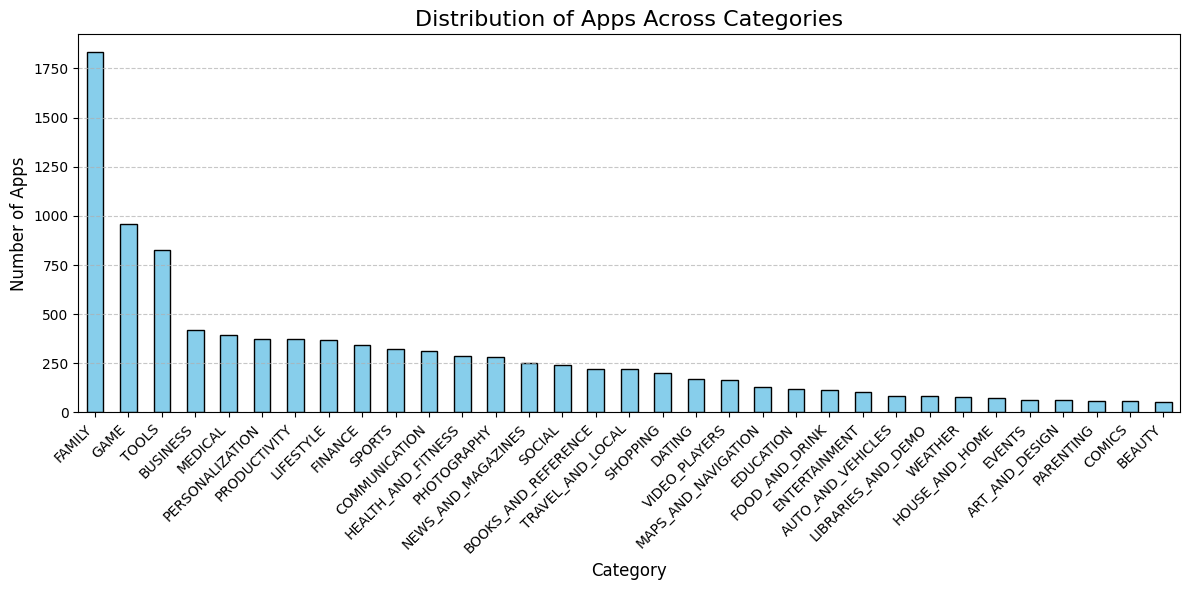

In [4]:
import matplotlib.pyplot as plt

# Count the number of apps in each category
category_counts = apps_df['Category'].value_counts()

# Plot the distribution as a bar chart
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Apps Across Categories", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Apps", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


Metrics Analysis:
Examine app ratings, size, popularity, and pricing trends.

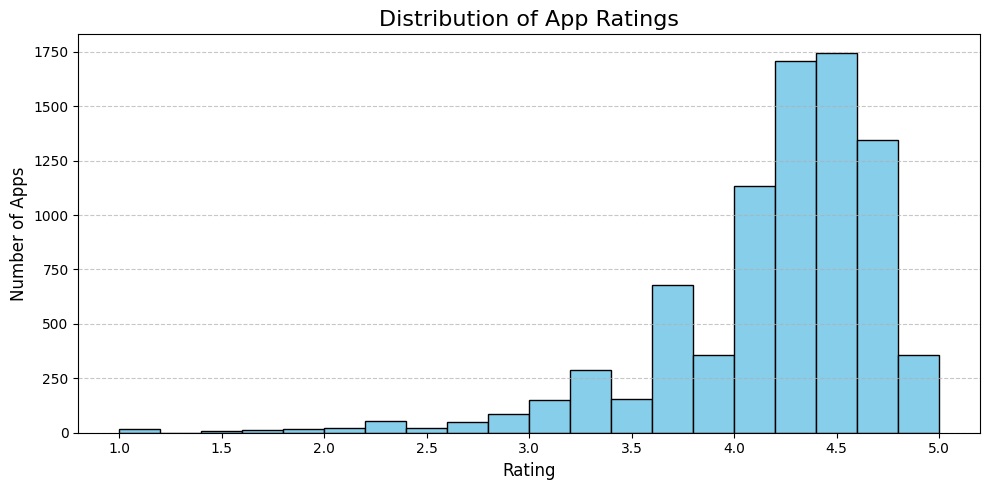

{'Mean Rating': 4.173243045387993,
 'Median Rating': 4.3,
 'Standard Deviation': 0.5366247303874476,
 'Min Rating': 1.0,
 'Max Rating': 5.0}

In [5]:
# Ratings analysis: Distribution and summary statistics
ratings = apps_df['Rating'].dropna()

# Plot a histogram for ratings
plt.figure(figsize=(10, 5))
plt.hist(ratings, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of App Ratings", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Apps", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Calculate summary statistics for ratings
ratings_summary = {
    "Mean Rating": ratings.mean(),
    "Median Rating": ratings.median(),
    "Standard Deviation": ratings.std(),
    "Min Rating": ratings.min(),
    "Max Rating": ratings.max()
}

plt.show()
ratings_summary


Sentiment Analysis:
Assess user sentiments through reviews.

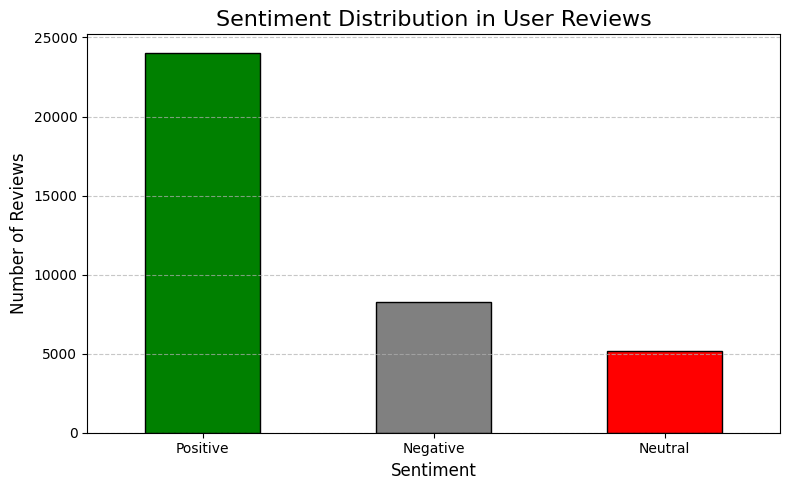

{'Positive': 23998, 'Negative': 8271, 'Neutral': 5163}

In [6]:
# Sentiment Distribution: Count the occurrences of each sentiment
sentiment_counts = user_reviews_df['Sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'], edgecolor='black')
plt.title("Sentiment Distribution in User Reviews", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Display sentiment counts for reference
sentiment_counts.to_dict()


Interactive Visualization:
Utilize code for compelling visualizations.

In [7]:
pip install plotly


In [8]:
import plotly.express as px

# Count the number of apps in each category
category_counts = apps_df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Number of Apps']

# Create an interactive bar chart
fig = px.bar(
    category_counts,
    x='Category',
    y='Number of Apps',
    title='Interactive Distribution of Apps Across Categories',
    labels={'Number of Apps': 'Number of Apps', 'Category': 'App Category'},
    color='Number of Apps',
    color_continuous_scale='Viridis'
)

# Customize the layout
fig.update_layout(
    xaxis=dict(title='Category', tickangle=-45),
    yaxis=dict(title='Number of Apps'),
    template='plotly_dark'
)

# Show the interactive plot
fig.show()


Category Exploration

In [9]:
import plotly.express as px

# Count the number of apps in each category
category_counts = apps_df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Number of Apps']

# Create an interactive bar chart
fig = px.bar(
    category_counts,
    x='Category',
    y='Number of Apps',
    title='Interactive Distribution of Apps Across Categories',
    labels={'Number of Apps': 'Number of Apps', 'Category': 'App Category'},
    color='Number of Apps',
    color_continuous_scale='Viridis'
)

# Customize the layout
fig.update_layout(
    xaxis=dict(title='Category', tickangle=-45),
    yaxis=dict(title='Number of Apps'),
    template='plotly_dark'
)

# Show the interactive plot
fig.show()


Metrics Analysis

In [10]:
# Filter out rows with missing ratings or installs
metrics_df = apps_df.dropna(subset=['Rating', 'Installs'])

# Create a scatter plot
fig = px.scatter(
    metrics_df,
    x='Rating',
    y='Installs',
    size='Installs',
    color='Rating',
    hover_name='App',
    title='Interactive Scatter Plot of Ratings vs Installs',
    labels={'Rating': 'App Rating', 'Installs': 'Number of Installs'},
    color_continuous_scale='Turbo'
)

# Customize the layout
fig.update_layout(template='plotly_dark')

# Show the plot
fig.show()


 Pricing Trends

In [11]:
# Add a column to distinguish free and paid apps
apps_df['App Type'] = apps_df['Price'].apply(lambda x: 'Paid' if x > 0 else 'Free')

# Create a histogram
fig = px.histogram(
    apps_df,
    x='App Type',
    title='Interactive Histogram of Free vs Paid Apps',
    labels={'App Type': 'Type of App', 'count': 'Number of Apps'},
    color='App Type',
    color_discrete_map={'Free': 'blue', 'Paid': 'gold'}
)

# Customize the layout
fig.update_layout(template='plotly_dark')

# Show the plot
fig.show()


 Sentiment Analysis
Bar Chart for Sentiment Distribution

In [12]:
# Count the number of reviews for each sentiment
sentiment_counts = user_reviews_df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Number of Reviews']

# Create a bar chart
fig = px.bar(
    sentiment_counts,
    x='Sentiment',
    y='Number of Reviews',
    title='Interactive Sentiment Distribution of User Reviews',
    labels={'Sentiment': 'Sentiment', 'Number of Reviews': 'Number of Reviews'},
    color='Sentiment',
    color_discrete_map={'Positive': 'green', 'Neutral': 'gray', 'Negative': 'red'}
)

# Customize the layout
fig.update_layout(template='plotly_dark')

# Show the plot
fig.show()


 Polarity and Subjectivity Analysis
Scatter Plot for Sentiment Polarity vs. Subjectivity

In [13]:
# Filter out rows with missing sentiment polarity or subjectivity
polarity_df = user_reviews_df.dropna(subset=['Sentiment_Polarity', 'Sentiment_Subjectivity'])

# Create a scatter plot
fig = px.scatter(
    polarity_df,
    x='Sentiment_Polarity',
    y='Sentiment_Subjectivity',
    color='Sentiment',
    hover_name='Translated_Review',
    title='Interactive Polarity vs Subjectivity of Reviews',
    labels={
        'Sentiment_Polarity': 'Polarity (Negative to Positive)',
        'Sentiment_Subjectivity': 'Subjectivity (Objective to Subjective)'
    },
    color_discrete_map={'Positive': 'green', 'Neutral': 'gray', 'Negative': 'red'}
)

# Customize the layout
fig.update_layout(template='plotly_dark')

# Show the plot
fig.show()


Output hidden; open in https://colab.research.google.com to view.

Skill Enhancement:
Integrate insights from the "Understanding Data Visualization" course.


Interactive Bar Chart with Annotations
Category Distribution with Highlighted Key Category

In [14]:
import plotly.graph_objects as go

# Data preparation
category_counts = apps_df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Number of Apps']

# Create a bar chart
fig = go.Figure()

# Add bars for all categories
fig.add_trace(go.Bar(
    x=category_counts['Category'],
    y=category_counts['Number of Apps'],
    marker_color='skyblue',
    name='Apps',
    hoverinfo='x+y'
))

# Add annotation for the highest category
max_category = category_counts.iloc[0]
fig.add_annotation(
    x=max_category['Category'],
    y=max_category['Number of Apps'],
    text=f"Most Popular: {max_category['Category']}",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40
)

# Chart formatting
fig.update_layout(
    title='App Distribution Across Categories (with Highlights)',
    xaxis_title='Category',
    yaxis_title='Number of Apps',
    template='plotly_white',
    xaxis=dict(tickangle=-45),
    showlegend=False
)

fig.show()


Scatter Plot with Logarithmic Scale
Ratings vs. Install Counts (Log Scale for Installs)

In [15]:
fig = px.scatter(
    metrics_df,
    x='Rating',
    y='Installs',
    size='Installs',
    color='Rating',
    hover_name='App',
    title='App Ratings vs Install Counts (Logarithmic Scale)',
    labels={'Rating': 'App Rating', 'Installs': 'Number of Installs'},
    log_y=True,  # Apply logarithmic scale
    color_continuous_scale='Plasma'
)

# Add a reference line for average rating
fig.add_hline(
    y=metrics_df['Rating'].mean(),
    line_dash="dot",
    annotation_text="Average Rating",
    annotation_position="top left"
)

fig.show()


 Sentiment Analysis with Filters
User Sentiments Filtered by Categories or App Types

In [16]:
# Merge sentiment data with apps to include categories
merged_df = pd.merge(user_reviews_df, apps_df[['App', 'Category']], on='App', how='left')

# Create a sentiment distribution filtered by categories
fig = px.histogram(
    merged_df,
    x='Sentiment',
    color='Category',
    title='Sentiment Distribution Filtered by Categories',
    labels={'Sentiment': 'Sentiment Type', 'count': 'Number of Reviews'},
    barmode='group'
)

fig.update_layout(template='plotly_white')
fig.show()
